In [1]:
import pandas as pd
import numpy as np

In [2]:
with open('20080101w_wave.txt','r') as f:
    w=f.readlines()

In [10]:
data=pd.read_csv('20080101w_wave.txt',sep='\s+',skiprows=7)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
w[737452]

'46759A 201801111700                    Q\n'

In [34]:
station=[]
y=[]
m=[]
d=[]
h=[]
wave=[]
per=[]
for st,i in enumerate(w):
    if(st>7):
        station.append(i[0:6])
        y.append(i[7:11])
        m.append(i[11:13])
        d.append(i[13:15])
        h.append(i[15:17])
        wave.append(i[20:24])
        per.append(i[25:28])

In [ ]:
wave[737444]

In [38]:
data=pd.DataFrame({'station':station,'y':y,'m':m,'d':d,'h':h,'wave':wave,'per':per})

In [52]:
year=[int(i) for i in y]

In [86]:
y2=[int(i) for i in y]
m2=[int(i) for i in m]
d2=[int(i) for i in d]
h2=[int(i) for i in h]
wave2=[np.nan if i.replace(' ','')=='' else float(i)   for i in wave ]
per2=[np.nan if i.replace(' ','')=='' else float(i)   for i in per ]



In [85]:
wave2=[]
for i in range(len(wave)):
    if(wave[i].replace(' ','')==''):
        wave2.append(np.nan)
    else:
        wave2.append(float(wave[i]))
        

In [133]:
pd.DataFrame({'station':station,'y':y2,'m':m2,'d':d2,'h':h2,'wave':wave2,'per':per2}).head()

,station,y,m,d,h,wave,per
0,46694A,2008,1,1,0,212.0,104.0
1,46694A,2008,1,1,2,248.0,104.0
2,46694A,2008,1,1,4,195.0,80.0
3,46694A,2008,1,1,6,207.0,95.0
4,46694A,2008,1,1,8,197.0,104.0


In [88]:
from datetime import datetime,timedelta

In [90]:
all_time=[datetime(y2[i],m2[i],d2[i],h2[i]) for i in range(len(y2))]

In [134]:
all_time=[]
for i in range(len(y2)):
    all_time.append(datetime(y2[i],m2[i],d2[i],h2[i]))

In [135]:
data=pd.DataFrame({'station':station,'time':all_time,'wave':wave2,'per':per2})

In [136]:
data.head()

,station,time,wave,per
0,46694A,2008-01-01 00:00:00,212.0,104.0
1,46694A,2008-01-01 02:00:00,248.0,104.0
2,46694A,2008-01-01 04:00:00,195.0,80.0
3,46694A,2008-01-01 06:00:00,207.0,95.0
4,46694A,2008-01-01 08:00:00,197.0,104.0


In [98]:
stationA=data[data['station']=='46694A'].copy()

In [99]:
stationA.head()

,station,time,wave,per
0,46694A,2008-01-01 00:00:00,212.0,104.0
1,46694A,2008-01-01 02:00:00,248.0,104.0
2,46694A,2008-01-01 04:00:00,195.0,80.0
3,46694A,2008-01-01 06:00:00,207.0,95.0
4,46694A,2008-01-01 08:00:00,197.0,104.0


In [137]:
stationA['time'][0]

Timestamp('2008-01-01 00:00:00')

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

In [147]:
stationA.head()

,station,time,wave,per
0,46694A,2008-01-01 00:00:00,212.0,104.0
1,46694A,2008-01-01 02:00:00,248.0,104.0
2,46694A,2008-01-01 04:00:00,195.0,80.0
3,46694A,2008-01-01 06:00:00,207.0,95.0
4,46694A,2008-01-01 08:00:00,197.0,104.0


(733042.0, 736695.2083333334)

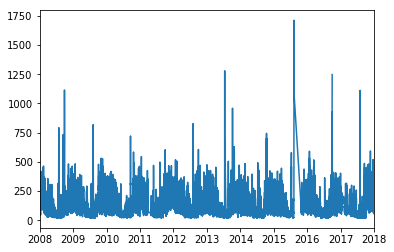

In [161]:
plt.plot(stationA['time'],stationA['wave'])
plt.xlim([datetime(2008,1,1,0),datetime(2018,1,1,5)])

In [162]:
stationA.head()

,station,time,wave,per
0,46694A,2008-01-01 00:00:00,212.0,104.0
1,46694A,2008-01-01 02:00:00,248.0,104.0
2,46694A,2008-01-01 04:00:00,195.0,80.0
3,46694A,2008-01-01 06:00:00,207.0,95.0
4,46694A,2008-01-01 08:00:00,197.0,104.0


In [164]:
newstat=[]
newtime=[]
newwave=[]
newperd=[]
startime=datetime(2008,1,1,0,0)


for i in range(len(stationA)):
    while(startime<stationA['time'][i]):
        newwave.append(np.nan)
        newtime.append(startime)
        startime=startime+timedelta(hours=1)
        
        
        
        
    newwave.append(stationA['wave'][i])
    newtime.append(startime)
    startime=startime+timedelta(hours=1)
                                         





In [165]:
data2=pd.DataFrame({'time':newtime,'wave':newwave})

In [166]:
data2.head()

,time,wave
0,2008-01-01 00:00:00,212.0
1,2008-01-01 01:00:00,NaN
2,2008-01-01 02:00:00,248.0
3,2008-01-01 03:00:00,NaN
4,2008-01-01 04:00:00,195.0


(736208.0, 736238.4166666666)

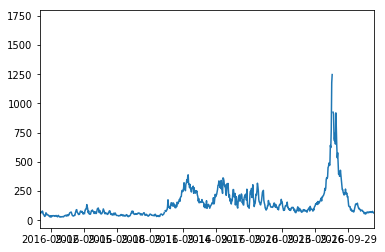

In [174]:
plt.plot(data2['time'],data2['wave'])
plt.xlim([datetime(2016,9,1,0),datetime(2016,10,1,10)])

In [180]:
data2018=data2[(data2['time']>=datetime(2018,1,1,0)) & (data2['time']<datetime(2019,1,1,0))]

In [181]:
data2018

,time,wave
87672,2018-01-01 00:00:00,220.0
87673,2018-01-01 01:00:00,239.0
87674,2018-01-01 02:00:00,251.0
87675,2018-01-01 03:00:00,206.0
87676,2018-01-01 04:00:00,166.0
87677,2018-01-01 05:00:00,197.0
87678,2018-01-01 06:00:00,164.0
87679,2018-01-01 07:00:00,163.0
87680,2018-01-01 08:00:00,152.0
87681,2018-01-01 09:00:00,153.0


In [138]:
B=[1,2,3,5]

In [139]:
A=B

In [141]:
A[0]=3

In [142]:
A

[3, 2, 3, 5]

In [143]:
B

[3, 2, 3, 5]

In [144]:
B=[1,2,3,5]
A=B.copy()
A[0]=3

In [145]:
A

[3, 2, 3, 5]

In [146]:
B

[1, 2, 3, 5]